In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plays = pd.read_csv('data/plays.csv')
week1 = pd.read_csv('data/week1.csv')
week2 = pd.read_csv('data/week2.csv')
#week3 = pd.read_csv('data/week3.csv')

In [3]:
tracking = pd.concat([week1,week2])

In [4]:
tracking.shape

(2217815, 19)

In [5]:
plays.columns

Index(['gameId', 'playId', 'playDescription', 'quarter', 'down', 'yardsToGo',
       'possessionTeam', 'playType', 'yardlineSide', 'yardlineNumber',
       'offenseFormation', 'personnelO', 'defendersInTheBox',
       'numberOfPassRushers', 'personnelD', 'typeDropback',
       'preSnapVisitorScore', 'preSnapHomeScore', 'gameClock',
       'absoluteYardlineNumber', 'penaltyCodes', 'penaltyJerseyNumbers',
       'passResult', 'offensePlayResult', 'playResult', 'epa',
       'isDefensivePI'],
      dtype='object')

In [6]:
tracking.columns

Index(['time', 'x', 'y', 's', 'a', 'dis', 'o', 'dir', 'event', 'nflId',
       'displayName', 'jerseyNumber', 'position', 'frameId', 'team', 'gameId',
       'playId', 'playDirection', 'route'],
      dtype='object')

In [53]:
julio_track = tracking[tracking['displayName']=='Julio Jones'].reset_index(drop=True)
julio_track.head()

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
0,2018-09-07T01:07:14.599Z,91.35,44.16,0.02,0.03,0.01,290.45,16.86,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,75,left,HITCH
1,2018-09-07T01:07:14.700Z,91.37,44.17,0.03,0.03,0.02,290.45,29.61,None,2495454.0,Julio Jones,11.0,WR,2,away,2018090600,75,left,HITCH
2,2018-09-07T01:07:14.799Z,91.37,44.17,0.02,0.03,0.01,290.45,32.20,None,2495454.0,Julio Jones,11.0,WR,3,away,2018090600,75,left,HITCH
3,2018-09-07T01:07:14.900Z,91.37,44.17,0.02,0.02,0.00,290.45,34.52,None,2495454.0,Julio Jones,11.0,WR,4,away,2018090600,75,left,HITCH
4,2018-09-07T01:07:15.000Z,91.37,44.16,0.02,0.02,0.01,290.45,38.72,None,2495454.0,Julio Jones,11.0,WR,5,away,2018090600,75,left,HITCH


In [54]:
julio_track['playDirection'].value_counts()

left     2791
right    1558
Name: playDirection, dtype: int64

In [56]:
julio_track['route'].value_counts()

GO        1075
HITCH      673
OUT        525
CORNER     514
POST       456
CROSS      363
IN         246
SLANT      105
FLAT        42
Name: route, dtype: int64

In [57]:
len(set(julio_track['playId']))

69

In [58]:
julio_track['gameId'].value_counts()

2018090600    2728
2018091600    1621
Name: gameId, dtype: int64

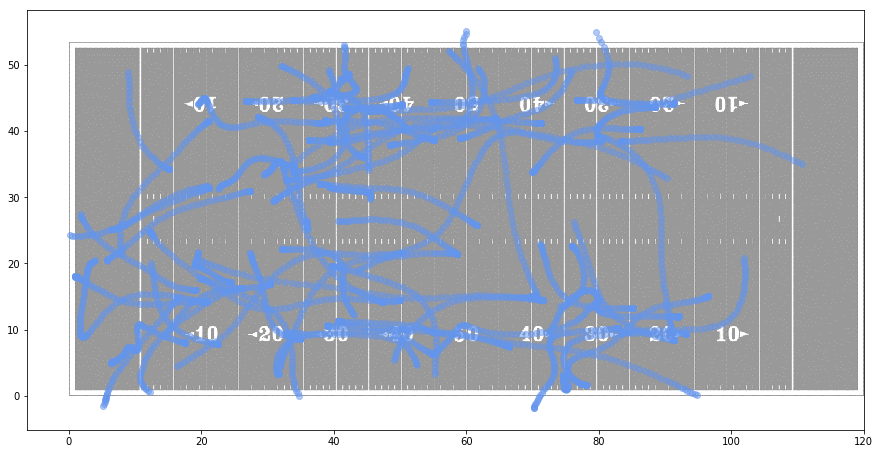

In [11]:
img = plt.imread('football_field_grayscale.png')

julio_fig, julio_ax = plt.subplots(figsize=(15,10))
julio_ax.imshow(img,extent=[0,120,0,53.34])

for x,y in zip(julio_track['x'],julio_track['y']):
    julio_ax.scatter(x,y,c='cornflowerblue',alpha=0.5)

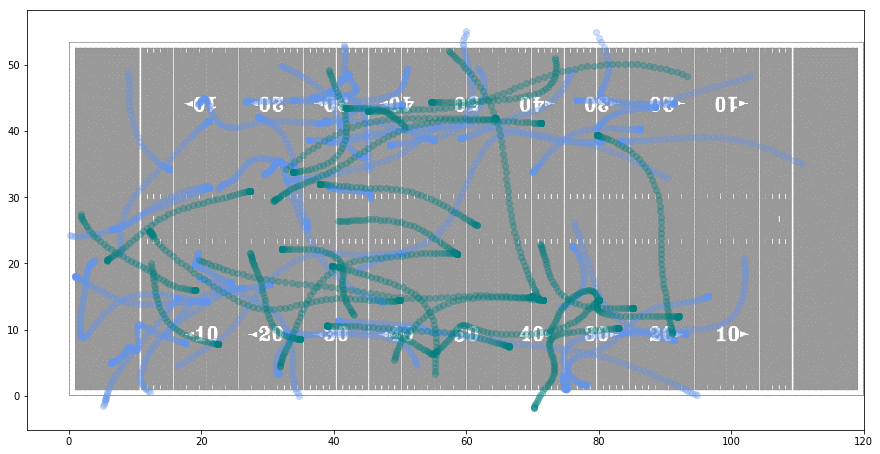

In [12]:
julio_fig, julio_ax = plt.subplots(figsize=(15,10))
julio_ax.imshow(img,extent=[0,120,0,53.34])
games = {2018090600:'cornflowerblue',2018092300:'darkorange',2018091600:'teal'}

for x,y,gid in zip(julio_track['x'],julio_track['y'],julio_track['gameId']):
    julio_ax.scatter(x,y,c=games[gid],alpha=0.3)

636 3844 2695 521 1546 267 4366 1423 2575 4239 402 2450 1940 656 1809 2717 1310 415 1568 545 4258 1698 2980 2207 168 2474 4395 4142 3506 3507 949 1205 312 3257 4282 1722 3004 1850 190 3392 1473 4417 1986 3138 4166 75 1869 1229 3279 3791 4306 4439 727 1751 2010 2650 4325 1894 3815 492 3181 632 4207 751 1262 4472 889 1402 1916 

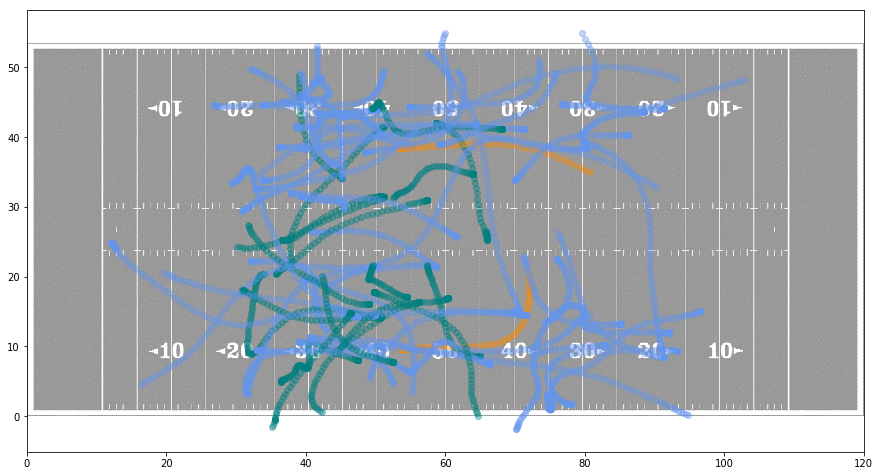

In [15]:
julio_fig, julio_ax = plt.subplots(figsize=(15,10))
julio_ax.imshow(img,extent=[0,120,0,53.34])

for play in set(julio_track['playId']):
    print(play,end=' ')
    play_track = julio_track[julio_track['playId']==play]
    play_x = np.array([julio_track[julio_track['playId']==play]['x']])
    play_y = np.array([julio_track[julio_track['playId']==play]['y']])
    
    #print(play_x)
    
    if ((play_x>40).any() and ((play_x<80).any())):
        for x,y in zip(play_x,play_y):
            julio_ax.scatter(x,y,c='cornflowerblue',alpha=0.4)
    elif(play_x>80).any():
        for x,y in zip(play_x,play_y):
            julio_ax.scatter(x-30,y,c='darkorange',alpha=0.4)
    else:
        for x,y in zip(play_x,play_y):
            julio_ax.scatter(x+30,y,c='teal',alpha=0.4)

636 3844 2695 521 1546 267 4366 1423 2575 4239 402 2450 1940 656 1809 2717 1310 415 1568 545 4258 1698 2980 2207 168 2474 4395 4142 3506 3507 949 1205 312 3257 4282 1722 3004 1850 190 3392 1473 4417 1986 3138 4166 75 1869 1229 3279 3791 4306 4439 727 1751 2010 2650 4325 1894 3815 492 3181 632 4207 751 1262 4472 889 1402 1916 

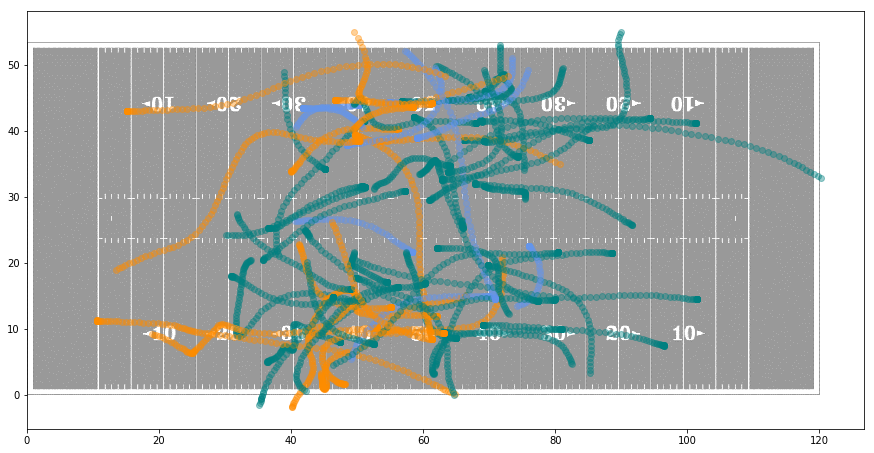

In [21]:
julio_fig, julio_ax = plt.subplots(figsize=(15,10))
julio_ax.imshow(img,extent=[0,120,0,53.34])

for play in set(julio_track['playId']):
    print(play,end=' ')
    play_track = julio_track[julio_track['playId']==play]
    play_x = np.array(julio_track[julio_track['playId']==play]['x'])
    play_y = np.array(julio_track[julio_track['playId']==play]['y'])
    
    #print(play_x)
    
    if ((play_x<40).any()):
        for x,y in zip(play_x,play_y):
            julio_ax.scatter(x+30,y,c='teal',alpha=0.4)
    elif(play_x>80).any():
        for x,y in zip(play_x,play_y):
            julio_ax.scatter(x-30,y,c='darkorange',alpha=0.4)
    else:
        for x,y in zip(play_x,play_y):
            julio_ax.scatter(x,y,c='cornflowerblue',alpha=0.4)

In [59]:
julio_track_left = julio_track[julio_track['playDirection']=='left']
julio_track_right = julio_track[julio_track['playDirection']=='right']

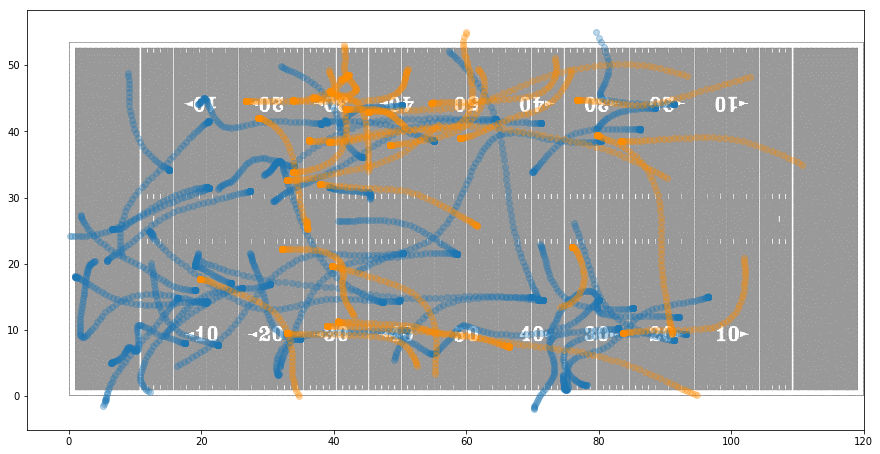

In [66]:
julio_fig, julio_ax = plt.subplots(figsize=(15,10))
julio_ax.imshow(img,extent=[0,120,0,53.34])
plt.scatter(julio_track_left['x'],julio_track_left['y'],alpha=0.3)
plt.scatter(julio_track_right['x'],julio_track_right['y'],alpha=0.3,c='darkorange')

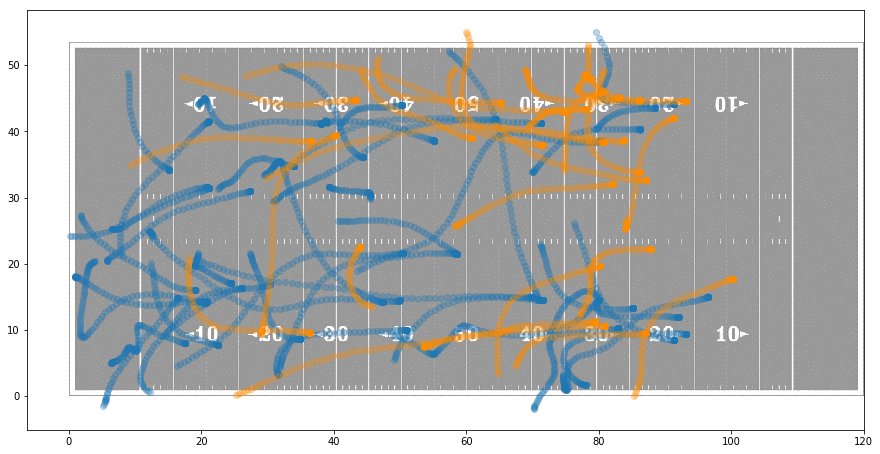

In [67]:
julio_fig, julio_ax = plt.subplots(figsize=(15,10))
julio_ax.imshow(img,extent=[0,120,0,53.34])
plt.scatter(julio_track_left['x'],julio_track_left['y'],alpha=0.3)
plt.scatter(120-julio_track_right['x'],julio_track_right['y'],alpha=0.3,c='darkorange')

In [78]:
for x,direct in zip(julio_track['x'],julio_track['playDirection']):
    if direct=='right':
        x = 120-x

In [79]:
julio_track_right

,time,x,y,s,a,dis,o,dir,event,nflId,displayName,jerseyNumber,position,frameId,team,gameId,playId,playDirection,route
586,2018-09-07T01:45:51.799Z,26.81,44.57,0.00,0.00,0.00,99.68,55.67,None,2495454.0,Julio Jones,11.0,WR,1,away,2018090600,949,right,GO
587,2018-09-07T01:45:51.900Z,26.81,44.57,0.00,0.00,0.00,99.68,55.69,None,2495454.0,Julio Jones,11.0,WR,2,away,2018090600,949,right,GO
588,2018-09-07T01:45:52.000Z,26.81,44.57,0.00,0.00,0.00,100.68,56.44,None,2495454.0,Julio Jones,11.0,WR,3,away,2018090600,949,right,GO
589,2018-09-07T01:45:52.099Z,26.81,44.57,0.00,0.00,0.00,101.72,55.37,None,2495454.0,Julio Jones,11.0,WR,4,away,2018090600,949,right,GO
590,2018-09-07T01:45:52.200Z,26.81,44.57,0.00,0.00,0.00,101.72,55.23,None,2495454.0,Julio Jones,11.0,WR,5,away,2018090600,949,right,GO
591,2018-09-07T01:45:52.299Z,26.81,44.57,0.00,0.00,0.00,104.85,53.59,None,2495454.0,Julio Jones,11.0,WR,6,away,2018090600,949,right,GO
592,2018-09-07T01:45:52.400Z,26.81,44.57,0.00,0.00,0.00,104.85,52.26,None,2495454.0,Julio Jones,11.0,WR,7,away,2018090600,949,right,GO
593,2018-09-07T01:45:52.500Z,26.81,44.57,0.00,0.00,0.00,107.99,52.55,None,2495454.0,Julio Jones,11.0,WR,8,away,2018090600,949,right,GO
594,2018-09-07T01:45:52.599Z,26.81,44.57,0.00,0.00,0.00,109.15,52.98,None,2495454.0,Julio Jones,11.0,WR,9,away,2018090600,949,right,GO
595,2018-09-07T01:45:52.700Z,26.81,44.57,0.00,0.00,0.00,109.15,54.77,None,2495454.0,Julio Jones,11.0,WR,10,away,2018090600,949,right,GO


In [80]:
new = [120-x for x,d in zip(julio_track['x'],julio_track['playDirection']) if d=='right']


[93.19,
 93.19,
 93.19,
 93.19,
 93.19,
 93.19,
 93.19,
 93.19,
 93.19,
 93.19,
 93.19,
 93.19,
 93.18,
 93.14,
 93.07,
 92.94,
 92.73,
 92.47,
 92.15,
 91.8,
 91.28,
 90.77,
 90.22,
 89.64,
 89.02,
 88.37,
 87.69,
 86.99000000000001,
 86.27000000000001,
 85.55,
 84.82,
 84.09,
 83.38,
 82.69,
 82.03,
 81.41,
 80.85,
 80.33,
 79.85,
 79.43,
 79.07,
 78.75999999999999,
 78.5,
 78.28999999999999,
 78.11,
 77.97999999999999,
 77.89,
 77.82,
 77.78,
 77.77000000000001,
 77.78,
 77.8,
 77.84,
 77.88,
 77.92,
 77.96000000000001,
 78.0,
 78.03,
 78.05,
 78.07,
 78.09,
 78.11,
 78.14,
 78.18,
 78.22999999999999,
 78.3,
 78.38,
 78.47999999999999,
 78.59,
 78.71000000000001,
 78.82,
 78.94,
 79.05,
 83.8,
 83.8,
 83.8,
 83.8,
 83.8,
 83.8,
 83.8,
 83.8,
 83.8,
 83.8,
 83.78999999999999,
 83.78,
 83.77000000000001,
 83.75,
 83.69,
 83.55,
 83.28999999999999,
 82.97,
 82.6,
 82.14,
 81.63,
 81.06,
 80.45,
 79.81,
 79.14,
 78.45,
 77.72,
 76.97,
 76.2,
 75.42,
 74.62,
 73.82,
 72.99000000000001,
 

In [ ]:
julio_fig, julio_ax = plt.subplots(figsize=(15,10))
julio_ax.imshow(img,extent=[0,120,0,53.34])

for p in julio_track['playId']